# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [6]:
import json
import pandas as pd
f = open('disease_data.json')
disease = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [7]:
print(type(disease))
print(disease.keys())

<class 'dict'>
dict_keys(['meta', 'data'])


In [8]:
print(type(disease['meta']))
print(type(disease['data']))

<class 'dict'>
<class 'list'>


In [9]:
print(disease['meta'].keys())

dict_keys(['view'])


In [11]:
type(disease['meta']['view'])

dict

In [13]:
disease['meta']['view'].keys()

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [15]:
disease['data'][0]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [18]:
disease['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [19]:
disease_df = pd.DataFrame(disease['data'])
disease_df.columns = [x['name'] for x in disease['meta']['view']['columns']]
disease_df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
disease_df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [25]:
type(disease_df['Topic'])

pandas.core.series.Series

In [29]:
disease_df['Topic'].unique()

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes',
       'Mental Health', 'Chronic Obstructive Pulmonary Disease',
       'Oral Health', 'Cardiovascular Disease', 'Immunization',
       'Chronic Kidney Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Tobacco', 'Overarching Conditions', 'Reproductive Health',
       'Disability'], dtype=object)

In [30]:
disease_df['Question'].unique()

array(['Binge drinking prevalence among adults aged >= 18 years',
       'Binge drinking intensity among adults aged >= 18 years who binge drink',
       'Heavy drinking among adults aged >= 18 years',
       'Binge drinking prevalence among women aged 18-44 years',
       'Binge drinking frequency among adults aged >= 18 years who binge drink',
       'Heavy drinking among women aged 18-44 years',
       'Arthritis among adults aged >= 18 years',
       'Current asthma prevalence among adults aged >= 18 years',
       'Arthritis among adults aged >= 18 years who are obese',
       'Arthritis among adults aged >= 18 years who have diabetes',
       'Arthritis among adults aged >= 18 years who have heart disease',
       'Asthma prevalence among women aged 18-44 years',
       'Physical inactivity among adults aged >= 18 years with arthritis',
       'Fair or poor health among adults aged >= 18 years with arthritis',
       'Influenza vaccination among noninstitutionalized adults aged 1

In [35]:
disease_df[disease_df['Topic'] == 'Asthma'].Question.unique()

array(['Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [53]:
disease_df[disease_df['Question'] == 'Current asthma prevalence among adults aged >= 18 years']['StratificationCategoryID1'].value_counts()

RACE       540
GENDER     220
OVERALL    110
Name: StratificationCategoryID1, dtype: int64

In [58]:
asthma_data = disease_df[(disease_df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') 
                         & (disease_df['StratificationCategoryID1'] == 'OVERALL')]

In [64]:
asthma_data.set_index('LocationAbbr')
asthma_data = asthma_data.sort_values(by = 'LocationAbbr')
asthma_by_state = asthma_data[['LocationAbbr', 'DataValue']]
asthma_by_state

,LocationAbbr,DataValue
9372,AK,8.8
9427,AK,9
9426,AL,9.8
9371,AL,9.7
9374,AR,8.5
...,...,...
9475,WI,8.4
9419,WV,11.8
9474,WV,11.8
9476,WY,9.6


In [66]:
asthma_by_state['DataValue'].describe

<bound method NDFrame.describe of 9372     8.8
9427       9
9426     9.8
9371     9.7
9374     8.5
        ... 
9475     8.4
9419    11.8
9474    11.8
9476     9.6
9421     9.5
Name: DataValue, Length: 110, dtype: object>

In [69]:
asthma_by_state['DataValue'] = asthma_by_state['DataValue'].astype(float)
asthma_by_state = asthma_by_state.groupby('LocationAbbr').mean()
asthma_by_state

,DataValue
LocationAbbr,
AK,8.90
AL,9.75
AR,8.50
AZ,9.35
CA,7.75
CO,8.80
CT,10.55
DC,9.95
DE,8.60


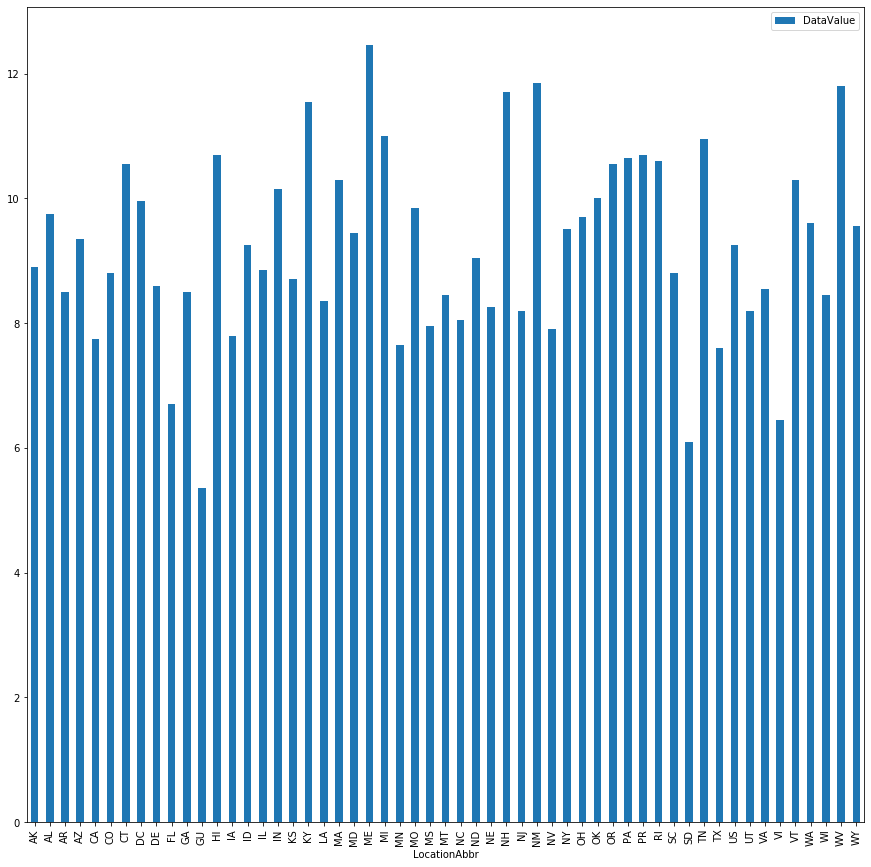

In [74]:
asthma_by_state.plot(kind='bar', figsize=(15,15))
plt.title('Asthma By State')
plt.xlabel()

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!